Plain test 3 matched with plain 3 trained image


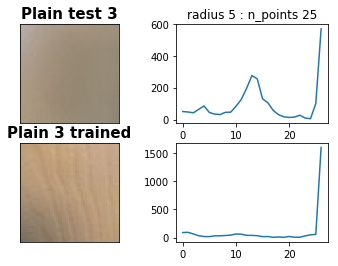

In [30]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from PIL import Image
from scipy import ndimage
from scipy import spatial
import tensorflow as tf
import imagehash
from scipy.stats import wasserstein_distance
from scipy.spatial import distance as dist

# settings for LBP
radius = 5
num_pts = 25

match=0
# Get four training images of texture and 3 training images of plain
pattern1trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern1train.jpeg')
pattern2trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern2train.jpeg')
pattern3trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern3train.jpeg')
pattern4trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern4train.jpeg')
pattern5trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern5train.jpeg')
pattern6trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern6train.jpeg')
pattern7trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern7train.jpeg')
plain1trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain1train.jpeg')
plain2trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain2train.jpeg')
plain3trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain3train.jpeg')
plain4trainimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain4train.jpeg')

pattern1trainarr = np.asarray(pattern1trainimg)
pattern2trainarr = np.asarray(pattern2trainimg)
pattern3trainarr = np.asarray(pattern3trainimg)
pattern4trainarr = np.asarray(pattern4trainimg)
pattern5trainarr = np.asarray(pattern5trainimg)
pattern6trainarr = np.asarray(pattern6trainimg)
pattern7trainarr = np.asarray(pattern7trainimg)
plain1trainarr = np.asarray(plain1trainimg)
plain2trainarr = np.asarray(plain2trainimg)
plain3trainarr = np.asarray(plain3trainimg)
plain4trainarr = np.asarray(plain3trainimg)

pattern1traingray = cv2.cvtColor(pattern1trainarr, cv2.COLOR_BGR2GRAY)
pattern2traingray = cv2.cvtColor(pattern2trainarr, cv2.COLOR_BGR2GRAY)
pattern3traingray = cv2.cvtColor(pattern3trainarr, cv2.COLOR_BGR2GRAY)
pattern4traingray = cv2.cvtColor(pattern4trainarr, cv2.COLOR_BGR2GRAY)
pattern5traingray = cv2.cvtColor(pattern5trainarr, cv2.COLOR_BGR2GRAY)
pattern6traingray = cv2.cvtColor(pattern6trainarr, cv2.COLOR_BGR2GRAY)
pattern7traingray = cv2.cvtColor(pattern7trainarr, cv2.COLOR_BGR2GRAY)
plain1traingray = cv2.cvtColor(plain1trainarr, cv2.COLOR_BGR2GRAY)
plain2traingray = cv2.cvtColor(plain2trainarr, cv2.COLOR_BGR2GRAY)
plain3traingray = cv2.cvtColor(plain3trainarr, cv2.COLOR_BGR2GRAY)
plain4traingray = cv2.cvtColor(plain4trainarr, cv2.COLOR_BGR2GRAY)

# Get 4 test imagess of texture and 3 training image of plain
pattern1testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern1test.jpeg')
pattern2testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern2test.jpeg')
pattern3testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern3test.jpeg')
pattern4testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/pattern4test.jpeg')
plain1testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain1test.jpeg')
plain2testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain2test.jpeg')
plain3testimg = Image.open('/Users/krishnendukar/bookchapter2/patternimg/plain3test.jpeg')

pattern1testarr = np.asarray(pattern1testimg)
pattern2testarr = np.asarray(pattern2testimg)
pattern3testarr = np.asarray(pattern3testimg)
pattern4testarr = np.asarray(pattern4testimg)
plain1testarr = np.asarray(plain1testimg)
plain2testarr = np.asarray(plain2testimg)
plain3testarr = np.asarray(plain3testimg)

pattern1testgray = cv2.cvtColor(pattern1testarr, cv2.COLOR_BGR2GRAY)
pattern2testgray = cv2.cvtColor(pattern2testarr, cv2.COLOR_BGR2GRAY)
pattern3testgray = cv2.cvtColor(pattern3testarr, cv2.COLOR_BGR2GRAY)
pattern4testgray = cv2.cvtColor(pattern4testarr, cv2.COLOR_BGR2GRAY)
plain1testgray = cv2.cvtColor(plain1testarr, cv2.COLOR_BGR2GRAY)
plain2testgray = cv2.cvtColor(plain2testarr, cv2.COLOR_BGR2GRAY)
plain3testgray = cv2.cvtColor(plain3testarr, cv2.COLOR_BGR2GRAY)

# Calculate the LBP features for all the seven training images
pattern1train_lbp = local_binary_pattern(pattern1traingray, num_pts, radius, 'uniform')
pattern2train_lbp = local_binary_pattern(pattern2traingray, num_pts, radius, 'uniform')
pattern3train_lbp = local_binary_pattern(pattern3traingray, num_pts, radius, 'uniform')
pattern4train_lbp = local_binary_pattern(pattern4traingray, num_pts, radius, 'uniform')
pattern5train_lbp = local_binary_pattern(pattern5traingray, num_pts, radius, 'uniform')
pattern6train_lbp = local_binary_pattern(pattern6traingray, num_pts, radius, 'uniform')
pattern7train_lbp = local_binary_pattern(pattern7traingray, num_pts, radius, 'uniform')
plain1train_lbp = local_binary_pattern(plain1traingray, num_pts, radius, 'uniform')
plain2train_lbp = local_binary_pattern(plain2traingray, num_pts, radius, 'uniform')
plain3train_lbp = local_binary_pattern(plain3traingray, num_pts, radius, 'uniform')
plain4train_lbp = local_binary_pattern(plain4traingray, num_pts, radius, 'uniform')

# calculate the LBP features for all the seven test images
pattern1test_lbp = local_binary_pattern(pattern1testgray, num_pts, radius, 'uniform')
pattern2test_lbp = local_binary_pattern(pattern2testgray, num_pts, radius, 'uniform')
pattern3test_lbp = local_binary_pattern(pattern3testgray, num_pts, radius, 'uniform')
pattern4test_lbp = local_binary_pattern(pattern4testgray, num_pts, radius, 'uniform')
plain1test_lbp = local_binary_pattern(plain1testgray, num_pts, radius, 'uniform')
plain2test_lbp = local_binary_pattern(plain2testgray, num_pts, radius, 'uniform')
plain3test_lbp = local_binary_pattern(plain3testgray, num_pts, radius, 'uniform')


imagestring = "Plain test 3"
# We will pick any one image say facecolor1 im and try to find
# its best match among the foundations
# Create a list with LBP features of all seven images
bins_num = int(plain3test_lbp.max() + 1)



test_hist, _ = np.histogram(plain3test_lbp, bins=bins_num, range=(0, bins_num),density=None)

lbp_features = [pattern1train_lbp, pattern2train_lbp, pattern3train_lbp, pattern4train_lbp, 
                pattern5train_lbp, pattern6train_lbp, pattern7train_lbp,
                plain1train_lbp, plain2train_lbp, plain3train_lbp, plain4train_lbp]
min_score = 10000 # Set a very large best score value initially
idx = 0 # To keep track of the winner
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.xticks([])
plt.yticks([])
ax1.set_title(imagestring,fontsize=15, fontweight = 'bold')
plt.subplot(221), plt.imshow(plain3testimg)
#plt.draw()
ax2 = fig.add_subplot(223)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.xticks([])
plt.yticks([])
# ax2.set_title('Foundation Color',fontsize=15, fontweight = 'bold')


plt.subplot(222),plt.plot(test_hist)   
plt.title('radius %i : n_points %i' %(radius,num_pts))
mymet=0
q = []
for feature in lbp_features:
    mymet=mymet+1
    histogram, _ = np.histogram(feature, bins=bins_num, range=(0, bins_num),density=None)
    p = np.asarray(test_hist)
    q = np.asarray(histogram)
    filter_idx = np.where(np.logical_and(p != 0, q != 0))

    minima = np.minimum(test_hist,histogram)
    intersection = np.true_divide(np.sum(minima),np.sum(histogram))
    difidx = p-q
    score = .5*(np.sum((p-q)**2/(p+q+1e-10)))
    scorewas = wasserstein_distance(p,q)
    scorechisq = .5*(np.sum((p-q)**2/(p+q+1e-10)))
    scoresimple = np.sum((p-q)**2)
    scoreseucl = dist.euclidean(p,q)
    scoresman = dist.cityblock(p,q)
  #  score = np.sum(difidx*difidx)
#    print ("%s mymet %d score %s screchi %s scorescipy %s intersection" %(mymet, score, scorechisq, scoreseucl, intersection))
    if score < min_score:
        min_score = score
        match = mymet-1

#print ("%s score %s min_score %s winner" %(score, min_score,winner))
   
if match == 0:
    print("%s matched with pattern 1 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern1trainimg)
    ax2.set_title('Pattern 1 trained',fontsize=15, fontweight = 'bold')
elif match == 1:
    print("%s matched with pattern 2 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern2trainimg)
    ax2.set_title('Pattern 2 trained',fontsize=15, fontweight = 'bold')
elif match == 2:
    print("%s matched with pattern 3 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern3trainimg)
    ax2.set_title('Pattern 3 trained',fontsize=15, fontweight = 'bold')
elif match == 3:
    print("%s matched with pattern 4 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern4trainimg)
    ax2.set_title('Pattern 4 trained',fontsize=15, fontweight = 'bold')
elif match == 4:
    print("%s matched with pattern 5 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern5trainimg)
    ax2.set_title('Pattern 5 trained',fontsize=15, fontweight = 'bold')
elif match == 5:
    print("%s matched with pattern 6 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern6trainimg)
    ax2.set_title('Pattern 6 trained',fontsize=15, fontweight = 'bold')    
elif match == 6:
    print("%s matched with pattern 7 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(pattern7trainimg)
    ax2.set_title('Pattern 7 trained',fontsize=15, fontweight = 'bold') 
elif match == 7:
    print("%s matched with plain 1 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(plain1trainimg) 
    ax2.set_title('Plain 1 trained',fontsize=15, fontweight = 'bold')
elif match == 8:
    print("%s matched with plain 2 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(plain2trainimg) 
    ax2.set_title('Plain 2 trained',fontsize=15, fontweight = 'bold')
elif match == 9:
    print("%s matched with plain 3 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(plain3trainimg)
    ax2.set_title('Plain 3 trained',fontsize=15, fontweight = 'bold')
elif match == 10:
    print("%s matched with plain 4 trained image" %(imagestring))
    plt.subplot(223),plt.imshow(plain4trainimg)
    ax2.set_title('Plain 4 trained',fontsize=15, fontweight = 'bold')
    
    
    
plt.subplot(224),plt.plot(histogram) 
plt.show()


In [ ]:
minima = np.minimum

In [19]:
(mfc1, sfc1) = cv2.meanStdDev(facecol1arr)
statfc1 = np.concatenate([mfc1, sfc1]).flatten()

(mfc2, sfc2) = cv2.meanStdDev(facecol2arr)
statfc2 = np.concatenate([mfc2, sfc2]).flatten()

(mfc3, sfc3) = cv2.meanStdDev(facecol3arr)
statfc3 = np.concatenate([mfc3, sfc3]).flatten()

(mfc4, sfc4) = cv2.meanStdDev(facecol4arr)
statfc4 = np.concatenate([mfc4, sfc4]).flatten()

(mfc5, sfc5) = cv2.meanStdDev(facecol5arr)
statfc5 = np.concatenate([mfc5, sfc5]).flatten()

(mfc6, sfc6) = cv2.meanStdDev(facecol6arr)
statfc6 = np.concatenate([mfc6, sfc6]).flatten()

(mfc7, sfc7) = cv2.meanStdDev(facecol7arr)
statfc7 = np.concatenate([mfc7, sfc7]).flatten()


In [20]:
(mfnd1, sfnd1) = cv2.meanStdDev(found1arr)
statfnd1 = np.concatenate([mfnd1, sfnd1]).flatten()

(mfnd2, sfnd2) = cv2.meanStdDev(found2arr)
statfnd2 = np.concatenate([mfnd2, sfnd2]).flatten()

(mfnd3, sfnd3) = cv2.meanStdDev(found3arr)
statfnd3 = np.concatenate([mfnd3, sfnd3]).flatten()

(mfnd4, sfnd4) = cv2.meanStdDev(found4arr)
statfnd4 = np.concatenate([mfnd4, sfnd4]).flatten()

(mfnd5, sfnd5) = cv2.meanStdDev(found5arr)
statfnd5 = np.concatenate([mfnd5, sfnd5]).flatten()

(mfnd6, sfnd6) = cv2.meanStdDev(found6arr)
statfnd6 = np.concatenate([mfnd6, sfnd6]).flatten()

(mfnd7, sfnd7) = cv2.meanStdDev(found7arr)
statfnd7 = np.concatenate([mfnd7, sfnd7]).flatten()

(mfnd8, sfnd8) = cv2.meanStdDev(found8arr)
statfnd8 = np.concatenate([mfnd8, sfnd8]).flatten()

(mfnd9, sfnd9) = cv2.meanStdDev(found9arr)
statfnd9 = np.concatenate([mfnd9, sfnd9]).flatten()

(mfnd10, sfnd10) = cv2.meanStdDev(found10arr)
statfnd10 = np.concatenate([mfnd10, sfnd10]).flatten()

In [26]:
print ("%s statfc1" %(statfc1))
print ("%s statfc2" %(statfc2))
print ("%s statfc3" %(statfc3))
print ("%s statfc4" %(statfc4))
print ("%s statfc5" %(statfc5))
print ("%s statfc6" %(statfc6))
print ("%s statfc7" %(statfc7))

print ("%s statfnd1" %(statfnd1))
print ("%s statfnd2" %(statfnd2))
print ("%s statfnd3" %(statfnd3))
print ("%s statfnd4" %(statfnd4))
print ("%s statfnd5" %(statfnd5))
print ("%s statfnd6" %(statfnd6))
print ("%s statfnd7" %(statfnd7))
print ("%s statfnd8" %(statfnd8))
print ("%s statfnd9" %(statfnd9))
print ("%s statfnd10" %(statfnd10))

[248.6548     235.782      223.8172       2.76283133   4.52805433
   6.51353853] statfc1
[240.0956     212.1252     190.31         3.2493785    6.26341161
   9.54812547] statfc2
[231.2768     190.0048     171.7464       5.74715423  11.24241864
  15.5199126 ] statfc3
[217.5484     178.024      158.732        8.36275418  12.63871133
  16.75059927] statfc4
[216.242      159.4576     116.514       12.03947823  14.53614124
  21.68408181] statfc5
[216.7092     197.9768     182.2944       6.72147568   7.85158976
  11.38699823] statfc6
[106.47        76.7052      63.1536      18.76484745  15.73957728
  13.49632569] statfc7
[2.44071200e+02 2.14111200e+02 1.86031200e+02 3.66238392e-01
 5.56088626e-01 1.89279053e-01] statfnd1
[231.9664     206.0032     178.9616       0.34938666   0.25296197
   0.23690808] statfnd2
[226.36       194.92       172.28        10.00151988   7.86089053
   6.72023809] statfnd3
[214.7916     178.8748     152.846        1.65655348   1.46394158
   1.50036129] statfnd4
[216.

In [1]:
if statfc1[0]<minsimilarity:
            minsimilarity = similarity
            minsimilarityindex=j
    print ("face %s found %s similarity %s strucsim %s minsimilarity %s minsimilarityindx %s" % (i, j, similarity, strucsim, minsimilarity, minsimilarityindex))

IndentationError: unindent does not match any outer indentation level (<ipython-input-1-5cecd5b0e7b7>, line 4)

In [5]:
# individually using data[row][col].

# For example:
for row in pattern1traingray:
    print(' '.join('{:3}'.format(value) for value in row))

# Here's another more compact representation.
chars = '@%#*+=-:. '  # Change as desired.
scale = (len(chars)-1)/255.
print()
for row in data:
    print(' '.join(chars[int(value*scale)] for value in row))

 96  83 102 112 122 127 138 122  95 103 120 119 112 102 127 153 119 138 145 134 143 142 147 133 142 118 140 128 106  91  71 101 112 105 107 102 103  91 106 111 104  87  82  83  74  81  51  72  80  84
111 115 134 130 133 117 124 104  86  90  95  87  84  94 121 139 142 146 140 138 137 124 114 142 139 116 128 149 124 121 125 124 123 115 100 103  88  90  81  91 100 111 108  97  92  88  94  95  99 100
128 125 119 137 139 112 104  99  88  83  81  89  83  81 101 140 137 146 136 136 119  87 130 116 117 128 103 121 130 129 121 131 129 125 105 113  91  97  78  72  86  82  91 106  98  87 102  87  68  67
133 135 122 106 108  78  89  81  67  85  79  78  76  79  82 107 137 139 137 112 109 103 133  84 118 132 114 109 120 119  94  95  96  74 105 106  93  93  66  75  75  87  83  87  82  79  66  73  84  98
119 123  98  86  75  79  75  56  72  66  55  70  80  85  72  74  95 105 105  95  80  98 129  98 128 118 115  96 102 101  81  57  64  75 100 109 105  77  58  35  41  58  64  70  78  82  66  75  78  79


TypeError: 'module' object is not iterable

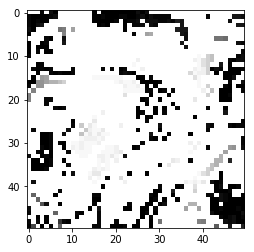

In [27]:
plt.imshow(pattern1train_lbp, cmap = 'gray')

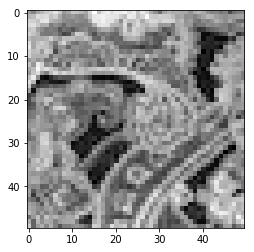

In [11]:
plt.imshow(pattern1traingray, cmap = 'gray')

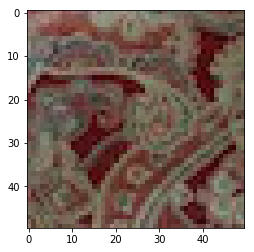

In [13]:
plt.imshow(pattern1trainimg)